In [137]:
# basic libraries
import pandas as pd
import numpy as np

In [138]:
#import our excel file in pyhton as df
df=pd.read_excel("fraud_data.xlsx")
df.head(6) # first 6 rows of data


,TransactionID,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,1,375.17,47605,Houston,Travel,18.0,0
1,2,950.76,38088,Los Angeles,Electronics,28.0,0
2,3,732.26,78752,Miami,Travel,20.0,0
3,4,599.06,55284,New York,Groceries,69.0,0
4,5,156.86,57043,New York,Groceries,79.0,0
5,6,156.84,35547,Chicago,Clothing,40.0,0


In [139]:
df.describe()

,TransactionID,Amount,Time,CardHolderAge,IsFraud
count,500.000000,475.000000,500.000000,476.000000,500.000000
mean,250.500000,641.112753,41141.482000,47.518908,0.054000
std,144.481833,1044.448065,25614.468967,18.677362,0.226244
min,1.000000,6.060000,55.000000,5.000000,0.000000
25%,125.750000,243.780000,18726.250000,32.000000,0.000000
50%,250.500000,518.810000,40772.000000,47.000000,0.000000
75%,375.250000,776.000000,63463.250000,63.000000,0.000000
max,500.000000,9691.578643,86066.000000,120.000000,1.000000


In [140]:
df.isnull().sum()    # this shows number of missing values in our data.
                     # we can not fit model on this data now

TransactionID        0
Amount              25
Time                 0
Location            25
MerchantCategory     0
CardHolderAge       24
IsFraud              0
dtype: int64

In [141]:
#to get percentage of data missing in each data
(df.isnull().sum() / len(df)) * 100

TransactionID       0.0
Amount              5.0
Time                0.0
Location            5.0
MerchantCategory    0.0
CardHolderAge       4.8
IsFraud             0.0
dtype: float64

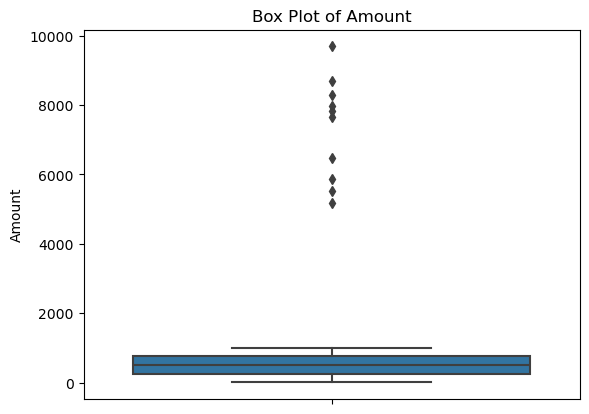

In [142]:
import seaborn as sns
sns.boxplot(y=df['Amount'])
plt.title("Box Plot of Amount")   
plt.show()
# here we can see that it contain outliers( very extreme values)
# we have to use median as substitute vlaue of missing values in amount.

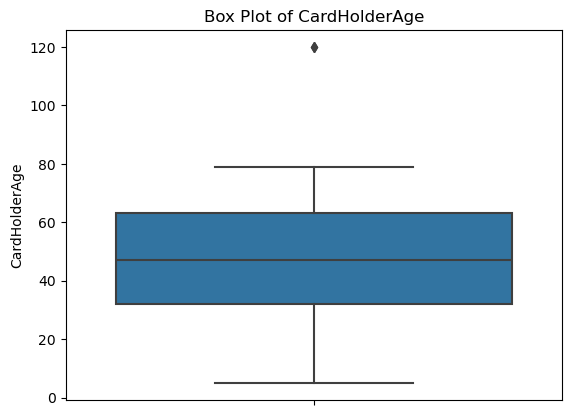

In [143]:
# also check for cardeholder age
sns.boxplot(y=df['CardHolderAge'])
plt.title("Box Plot of CardHolderAge")   
plt.show()
# it has outlier so we also use median here.

In [144]:
# for location we use mode because it is categorical variable.
# for Amount we will use median
# for Cardholderage we will use median
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['CardHolderAge'].fillna(df['CardHolderAge'].median(), inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

In [145]:
# now our data have no missing values.
df.isnull().sum()

TransactionID       0
Amount              0
Time                0
Location            0
MerchantCategory    0
CardHolderAge       0
IsFraud             0
dtype: int64

In [146]:
# check for data is balance or not.
print(df['IsFraud'].value_counts())

IsFraud
0    473
1     27
Name: count, dtype: int64


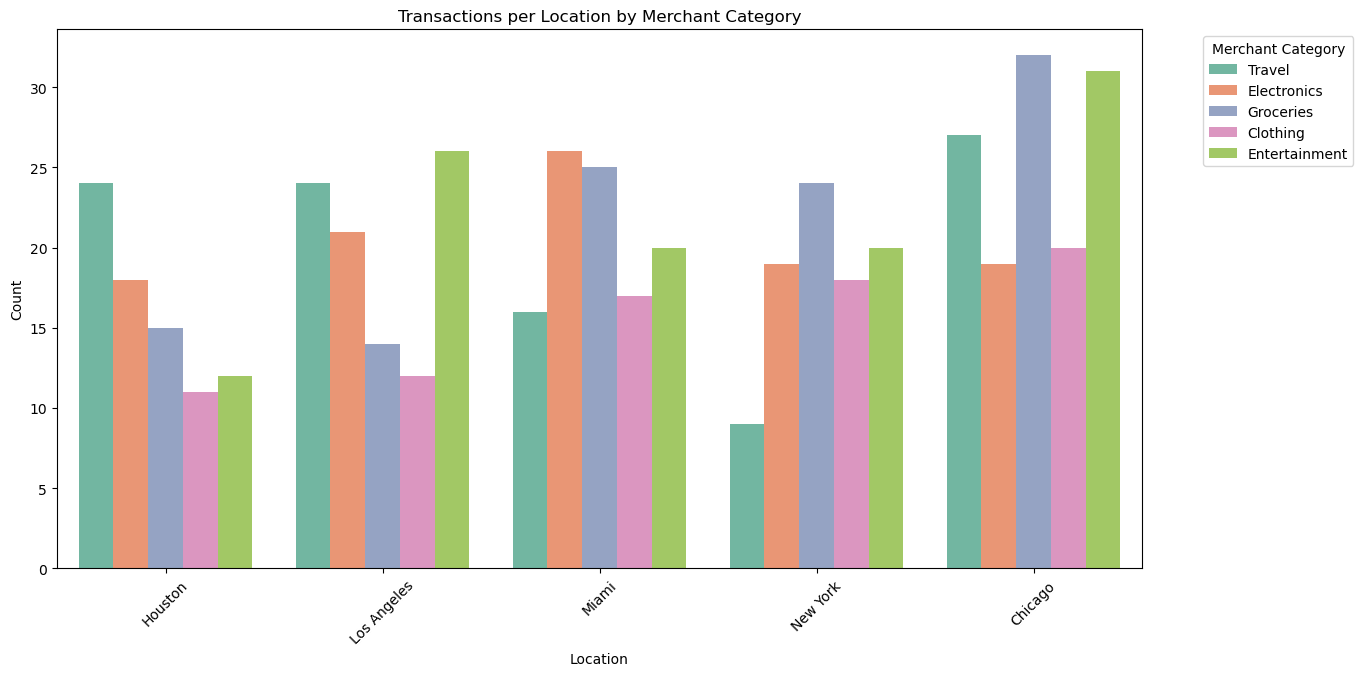

In [147]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x="Location", hue="MerchantCategory", palette="Set2")
plt.title("Transactions per Location by Merchant Category")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Merchant Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# we have 5 merchant category and 5 locations.

In [148]:
df.drop('TransactionID',axis=1,inplace=True)
df.head()
# Transactionsid doesn't have any significant relation with fruad transaction

,Amount,Time,Location,MerchantCategory,CardHolderAge,IsFraud
0,375.17,47605,Houston,Travel,18.0,0
1,950.76,38088,Los Angeles,Electronics,28.0,0
2,732.26,78752,Miami,Travel,20.0,0
3,599.06,55284,New York,Groceries,69.0,0
4,156.86,57043,New York,Groceries,79.0,0


In [149]:

# Encode categorical variables Location and MerchantCategory.
encoded_df = pd.get_dummies(df, columns=["Location", "MerchantCategory"], drop_first=True)
encoded_df.head()

,Amount,Time,CardHolderAge,IsFraud,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,MerchantCategory_Electronics,MerchantCategory_Entertainment,MerchantCategory_Groceries,MerchantCategory_Travel
0,375.17,47605,18.0,0,True,False,False,False,False,False,False,True
1,950.76,38088,28.0,0,False,True,False,False,True,False,False,False
2,732.26,78752,20.0,0,False,False,True,False,False,False,False,True
3,599.06,55284,69.0,0,False,False,False,True,False,False,True,False
4,156.86,57043,79.0,0,False,False,False,True,False,False,True,False


                           Feature  Correlation_with_IsFraud
0                          IsFraud                  1.000000
1       MerchantCategory_Groceries                  0.044004
2                   Location_Miami                  0.030174
3                Location_New York                  0.026257
4                             Time                  0.014175
5             Location_Los Angeles                 -0.005326
6                    CardHolderAge                 -0.007941
7   MerchantCategory_Entertainment                 -0.018988
8          MerchantCategory_Travel                 -0.030971
9                 Location_Houston                 -0.031861
10    MerchantCategory_Electronics                 -0.034176
11                          Amount                 -0.041102


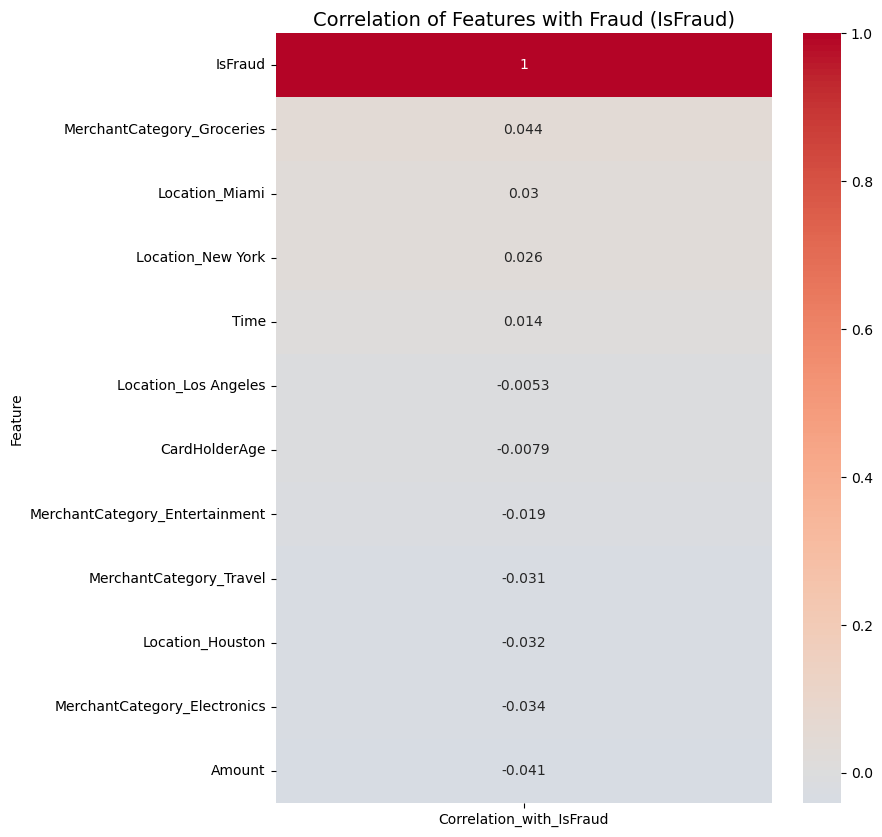

In [150]:
# we have to check correlation between variables to select important features for model.
corr_matrix = encoded_df.corr()

fraud_corr = corr_matrix["IsFraud"].sort_values(ascending=False)

fraud_corr_df = fraud_corr.reset_index()
fraud_corr_df.columns = ["Feature", "Correlation_with_IsFraud"]

# Print correlation values
print(fraud_corr_df)

# Heatmap for correlations with IsFraud only
plt.figure(figsize=(8, 10))
sns.heatmap(fraud_corr_df.set_index("Feature"), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Features with Fraud (IsFraud)", fontsize=14)
plt.show()

In [151]:
# now we are going to separate target variable from data.
X = encoded_df.drop("IsFraud", axis=1)
y = encoded_df["IsFraud"]
# it is important for train-test split part.

In [152]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: IsFraud, dtype: int64

In [153]:
# these are important libraries for model fitting and selection

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

In [154]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # we have now divided data into training and testing data.
# 20% for test and 80% for training.

In [157]:
# Because we have imbalance dataset , so we have to use SMOTE to balance out data.

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_resampled.value_counts().to_dict())

Before SMOTE: {0: 378, 1: 22}
After SMOTE: {0: 378, 1: 378}


In [158]:
#Our data contains outliers ,so we have to use standardization for scaling. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [170]:
# Logistic Regression model fitting.
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train_resampled)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
print("\n=== Logistic regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


=== Logistic regression Evaluation ===
Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89        95
           1       0.06      0.20      0.09         5

    accuracy                           0.80       100
   macro avg       0.51      0.52      0.49       100
weighted avg       0.91      0.80      0.85       100



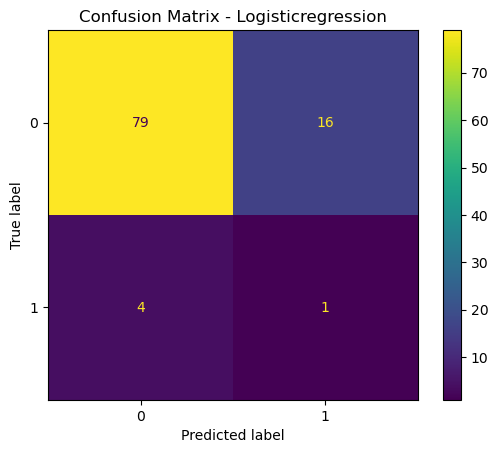

In [164]:
# For confussion matrix representation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.title("Confusion Matrix - Logisticregression")
plt.show() # verifying quantity of TP and TN on confusion matrix...

In [167]:
# Random Forest model fitting.
rf_model = RandomForestClassifier(
    n_estimators=200,     
    max_depth=6,          
    min_samples_split=15, 
    min_samples_leaf=8,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_scaled, y_train_resampled)

y_pred_rf = rf_model.predict(X_test_scaled)
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("\n=== Random Forest Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print("PR-AUC:", average_precision_score(y_test, y_prob_rf))


=== Random Forest Evaluation ===
Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        95
           1       0.00      0.00      0.00         5

    accuracy                           0.88       100
   macro avg       0.47      0.46      0.47       100
weighted avg       0.90      0.88      0.89       100

Confusion Matrix:
 [[88  7]
 [ 5  0]]
ROC-AUC: 0.34947368421052627
PR-AUC: 0.04739696835672068


In [172]:
# Side by side comparison of both models in terms for minority group(Fraud).
# Logistic Regression
log_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Minority Precision": classification_report(y_test, y_pred, output_dict=True)['1']['precision'],
    "Minority Recall": classification_report(y_test, y_pred, output_dict=True)['1']['recall'],
    "Minority F1": classification_report(y_test, y_pred, output_dict=True)['1']['f1-score'],
    "ROC-AUC": roc_auc_score(y_test, y_prob),
    "PR-AUC": average_precision_score(y_test, y_prob)
}

# Random Forest 
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Minority Precision": classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
    "Minority Recall": classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
    "Minority F1": classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
    "ROC-AUC": roc_auc_score(y_test, y_prob_rf),
    "PR-AUC": average_precision_score(y_test, y_prob_rf)
}

# Combine into a DataFrame
df_comparison = pd.DataFrame([log_metrics, rf_metrics], index=["Logistic Regression", "Random Forest"])
print(df_comparison)


                     Accuracy  Minority Precision  Minority Recall  \
Logistic Regression      0.80            0.058824              0.2   
Random Forest            0.88            0.000000              0.0   

                     Minority F1   ROC-AUC    PR-AUC  
Logistic Regression     0.090909  0.349474  0.047397  
Random Forest           0.000000  0.349474  0.047397  


In [ ]:
# since we had imbalance data set so we cannot perfer accuracy for model validation,we will use recall and f1.
# As we can see that logistic regression is performing better when it comes to minority although accuracy of random forest is high.
# our logistic regression model capturing fraud tranctision more effectivel while minimizing false positive.
# we can conclude that LR model is bettern than Random Forest model.....